In [519]:
import os
import pickle
import pandas as pd
import numpy as np
import savReaderWriter as sav
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.core.display import display, HTML
import seaborn as sns
import pandas as pd
import numpy as np

# Legend
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import unidecode
plt.rcParams.update({'font.size': 16})

In [521]:
# Importing data
with open( r'../_data/data_endes.pickle', 'rb') as f:
    df = pickle.load(f )

Check Unique ID

In [522]:
(df.CASEID + df.year.astype( str )).is_unique

True

From CMC to datetime. Info about datetime use [this link](https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime)

In [530]:
from datetime import datetime

datetime.strptime( f'09-02-2019', '%m-%d-%Y')

datetime.datetime(2019, 9, 2, 0, 0)

See [this article](https://demographicestimation.iussp.org/content/dhs-century-month-codes) to convert CMC to datetime

In [547]:
def cmc_date( cmc ):
    year = 1900 + int( ( cmc - 1 ) / 12 )
    month = int( cmc - 12*( year - 1900 ) )
    datetime_object = datetime.strptime( f'{month}/{year}', '%m/%Y')
    
    return datetime_object

In [549]:
df[ 'inerview_date' ] = df.V008.apply( lambda x: cmc_date( x ) )

In [558]:
df[ 'inerview_month' ] = df[ 'inerview_date' ].dt.strftime( "%b" )
df[ 'inerview_month1' ] = df[ 'inerview_date' ].dt.month
df[ 'inerview_year' ] = df[ 'inerview_date' ].dt.year
df.sort_values( 'inerview_month1', inplace = True )

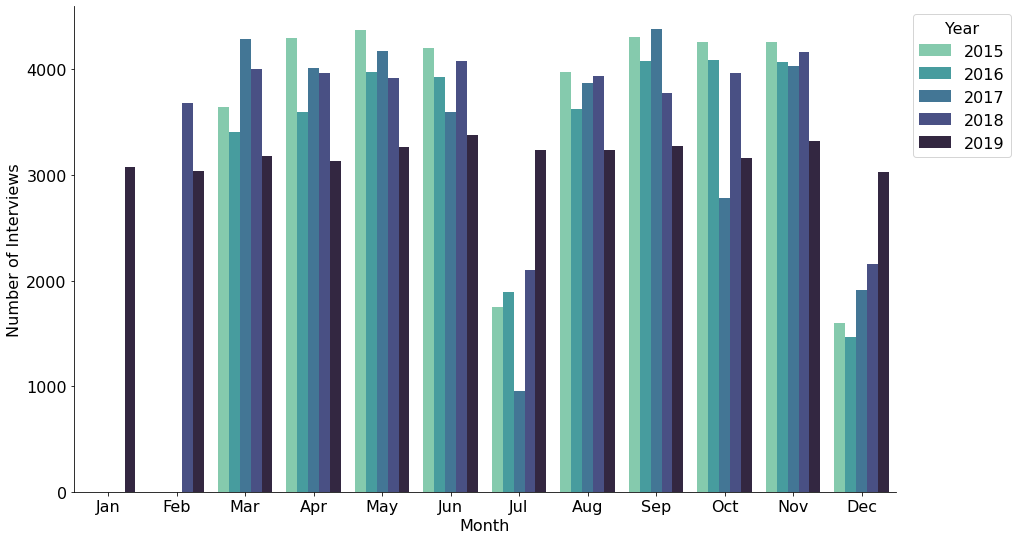

In [568]:
# Settin

fig1 = sns.catplot( data = df, x = 'inerview_month', kind = 'count',
            hue = 'inerview_year', 
            palette = sns.color_palette("mako_r", 5 ), 
            legend = False )


fig1.fig.set_size_inches( 15, 8 )

plt.ylabel( "Number of Interviews" )
plt.xlabel( "Month" )
plt.legend( title = 'Year', bbox_to_anchor = (1.15, 1 ), loc = 0 )

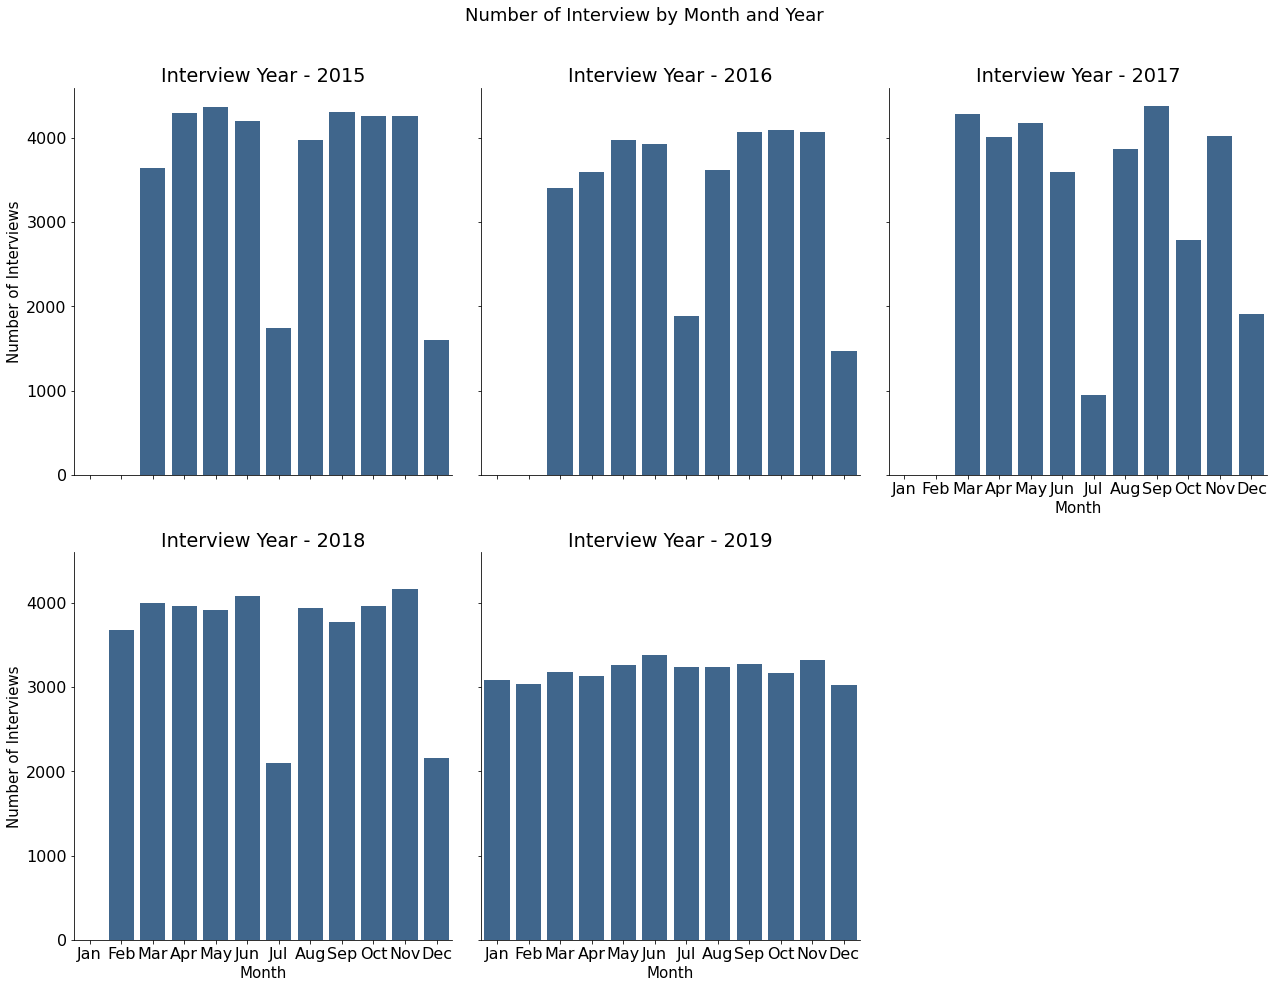

In [584]:
# Settin
fig1 = sns.catplot( data = df, x = 'inerview_month', kind = 'count',
            col = 'inerview_year', col_wrap = 3,
            legend = False,  color = (0.2, 0.4, 0.6, 0.6) )

# Fix figure size
fig1.fig.set_size_inches( 18, 14 )

# Fix title 
# add space between plots and title
fig1.fig.subplots_adjust(top=0.9)
fig1.fig.suptitle( "Number of Interview by Month and Year", 
                size = 18  )

# Add vertical space between plots
plt.subplots_adjust( hspace = 0.2 )

# Set axis labels
fig1.set_axis_labels( "Month", "Number of Interviews", size = 15 )

# Change title for each subplot
for year in fig1.axes_dict.keys():
    fig1.axes_dict[ year ].set_title( f'Interview Year - { year }' )
    


Distribution of Age

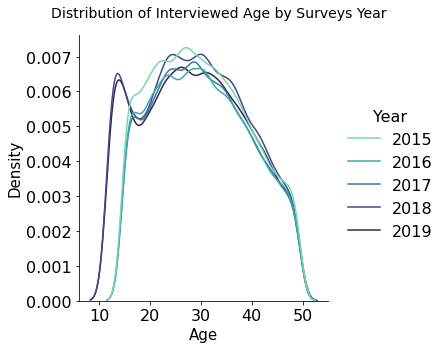

In [481]:
fig2 = sns.displot( data = df, x = 'V012', hue = 'year', 
            palette = sns.color_palette("mako_r", 5 ), 
           kind = "kde" )


# Make title
fig2.fig.subplots_adjust(top=0.9)
fig2.fig.suptitle( "Distribution of Interviewed Age by Surveys Year", 
                size = 14 )

# Change legend title
fig2._legend.set_title( "Year" )

# Set axis labels
fig2.set_axis_labels( "Age", "Density", size = 15 )


Distribution Total children ever born by place of residence

In [585]:
df.V102.unique()

array(['Urbano', 'Rural', nan, 'Urbana', 'Urban'], dtype=object)

In [586]:
df[ 'urban' ] = df.V102.copy()
df[ 'urban' ].replace( 'Urbana', 'Urbano', inplace = True )
df[ 'urban' ].replace( 'Urban', 'Urbano', inplace = True )

In [588]:
df.attrs['var_labels']

{'2015': {'CASEID': 'Case Identification',
  'V000': 'Country code and phase',
  'V001': 'Cluster number',
  'V002': 'Household number',
  'V003': "Respondent's line number",
  'V004': 'Ultimate area unit',
  'V008': 'Date of interview (CMC)',
  'V009': "Respondent's month of birth",
  'V010': "Respondent's year of birth",
  'V011': 'Date of birth (CMC)',
  'V012': 'Current age - respondent',
  'V024': 'Region',
  'V102': 'Type of place of residence',
  'V120': 'Has radio',
  'V121': 'Has television',
  'V122': 'Has refrigerator',
  'V123': 'Has bicycle',
  'V124': 'Has motorcycle/scooter',
  'V125': 'Has car/truck',
  'V127': 'Main floor material',
  'V133': 'Education in single years',
  'year': 'Year of the survey',
  'V201': 'Total children ever born',
  'V218': 'Number of living children',
  'V301': 'Knowledge of any method',
  'V302': 'Ever use of any method',
  'V323': 'Brand of pill used',
  'V323A': 'Brand of condom used',
  'V325A': 'Cost of current method',
  'V326': 'Last s

Text(0, 0.5, 'Total children ever born')

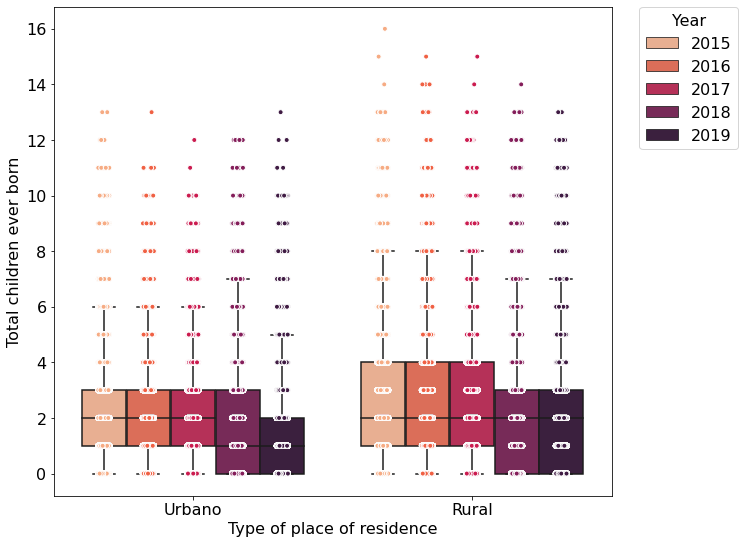

In [591]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )
sns.stripplot( y = "V201", hue = "year", 
                x = "urban", 
                data = df, jitter = True,
                palette = sns.color_palette("rocket", 5 )[::-1], 
                dodge = True, 
                linewidth = 1, edgecolor = 'white' )

# Plot boxplot
yx = sns.boxplot( y = "V201", hue = "year", 
                x = "urban", 
                data = df, 
                palette = sns.color_palette("rocket", 5 )[::-1], 
                fliersize = 0 )

# Number of labels
yr = df.year.unique().size

# Get legend labels and handles
handles, labels = yx.get_legend_handles_labels()

# When creating the legend, only use the first 5 elements
# to effectively remove the last.
plt.legend(handles[0:yr], labels[0:yr], bbox_to_anchor=(1.05, 1), 
           loc=2, borderaxespad=0., title = "Year" )

# x label
plt.xlabel( "Type of place of residence" )
plt.ylabel( "Total children ever born" )

### Total children by cohort

Text(0.5, 0, "Respondent's year of birth")

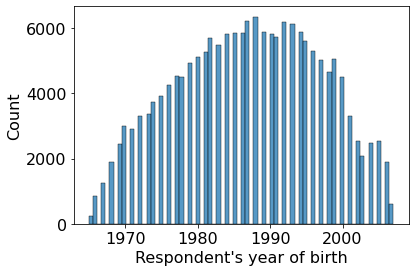

In [485]:
sns.histplot( data = df, x = 'V010')
plt.xlabel( "Respondent's year of birth" )

Text(0, 0.5, "Respondent's year of birth")

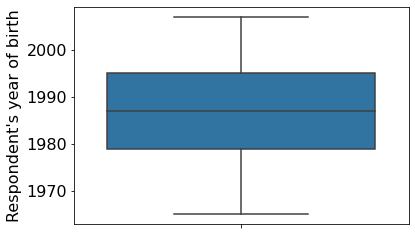

In [486]:
sns.boxplot( data = df, y = 'V010')
plt.ylabel( "Respondent's year of birth" )

In [592]:
def gen_cohot( series, size = 5 ):
    
    min1 = int( ( ( series.min() ) / size) ) * size
    max1 = int( np.ceil( ( series.max() ) / size) ) * size
    result = np.arange( min1, max1 + 1 , 5 )
    labels = np.ceil( ( result[ 1: ] + result[ :-1 ] ) / 2 ).astype( int )
    
    return result, labels

In [603]:
gen_cohot( df.V010, size = 10 )

(array([1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010]),
 array([1968, 1973, 1978, 1983, 1988, 1993, 1998, 2003, 2008]))

In [593]:
cohorts, labels = gen_cohot( df.V010 )

In [601]:
df[ 'birth_cohort' ] = pd.cut( df.V010, bins  = cohorts, 
                              include_lowest = True, labels = labels )

Text(0, 0.5, 'Total children ever born')

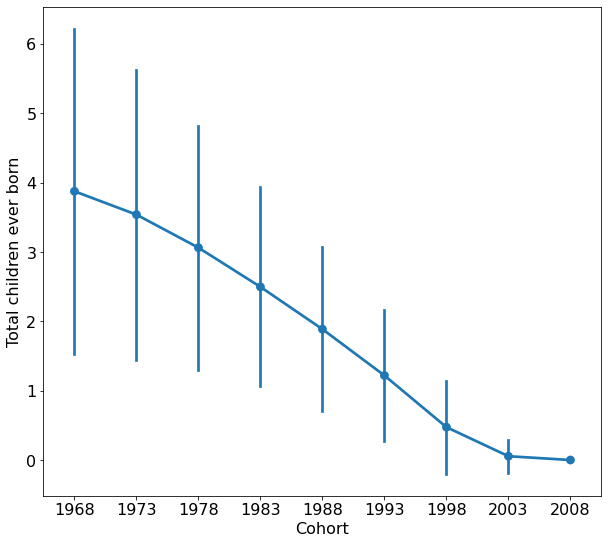

In [490]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "birth_cohort", y = "V201", 
               data = df, ci = 'sd')

# x label
plt.xlabel( "Cohort" )
plt.ylabel( "Total children ever born" )

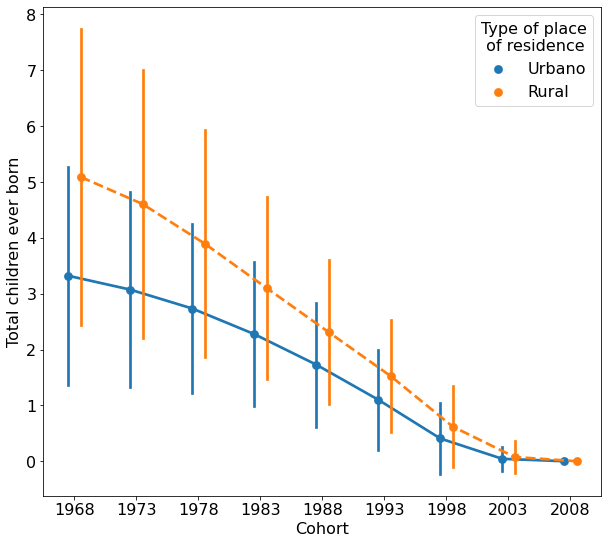

In [491]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "birth_cohort", y = "V201", 
               data = df, ci = 'sd', hue = 'urban', 
             dodge = 0.2, 
              linestyles = [ "-", "--" ] )

# x label
plt.xlabel( "Cohort" )
plt.ylabel( "Total children ever born" )

# Change legend title
plt.legend( title =  "Type of place\n of residence" )

## First sex relationship

In [492]:
df.V525.unique()

array(['Nunca tuvo relaciones sexuales', 20.0, 21.0, 17.0, 19.0, 18.0,
       nan, 16.0, 13.0, 25.0, 14.0, 22.0, 15.0, 12.0, 27.0, 24.0, 28.0,
       23.0, 26.0, 42.0, 'En la primera union', 29.0, 32.0, 35.0, 36.0,
       31.0, 30.0, 37.0, 33.0, 11.0, 41.0, 34.0,
       'No ha tenido relación sexual', 38.0, 'En la primera unión', 40.0,
       'Not had intercourse', 'At first union', 43.0, 39.0, 10.0, 8.0,
       7.0, 45.0, 44.0, 46.0, 47.0, 48.0], dtype=object)

In [493]:
df[ 'first_sex' ] = df.V525.copy()

In [494]:
df.first_sex.replace( 'Not had intercourse', np.nan, inplace = True )
df.first_sex.replace( 'No ha tenido relación sexual', np.nan, inplace = True )
df.first_sex.replace( 'Nunca tuvo relaciones sexuales', np.nan, inplace = True )
df.first_sex.replace( 'En la primera unión', 'At first union', inplace = True )
df.first_sex.replace( 'En la primera union', 'At first union', inplace = True )

In [495]:
# Filter values in variables

filter1 = df.first_sex == 'At first union'
df.loc[ filter1 , 'first_sex' ] = df.loc[ filter1 , 'V511' ]

In [497]:
df.first_sex = df.first_sex.astype( float )

Celaning region variable

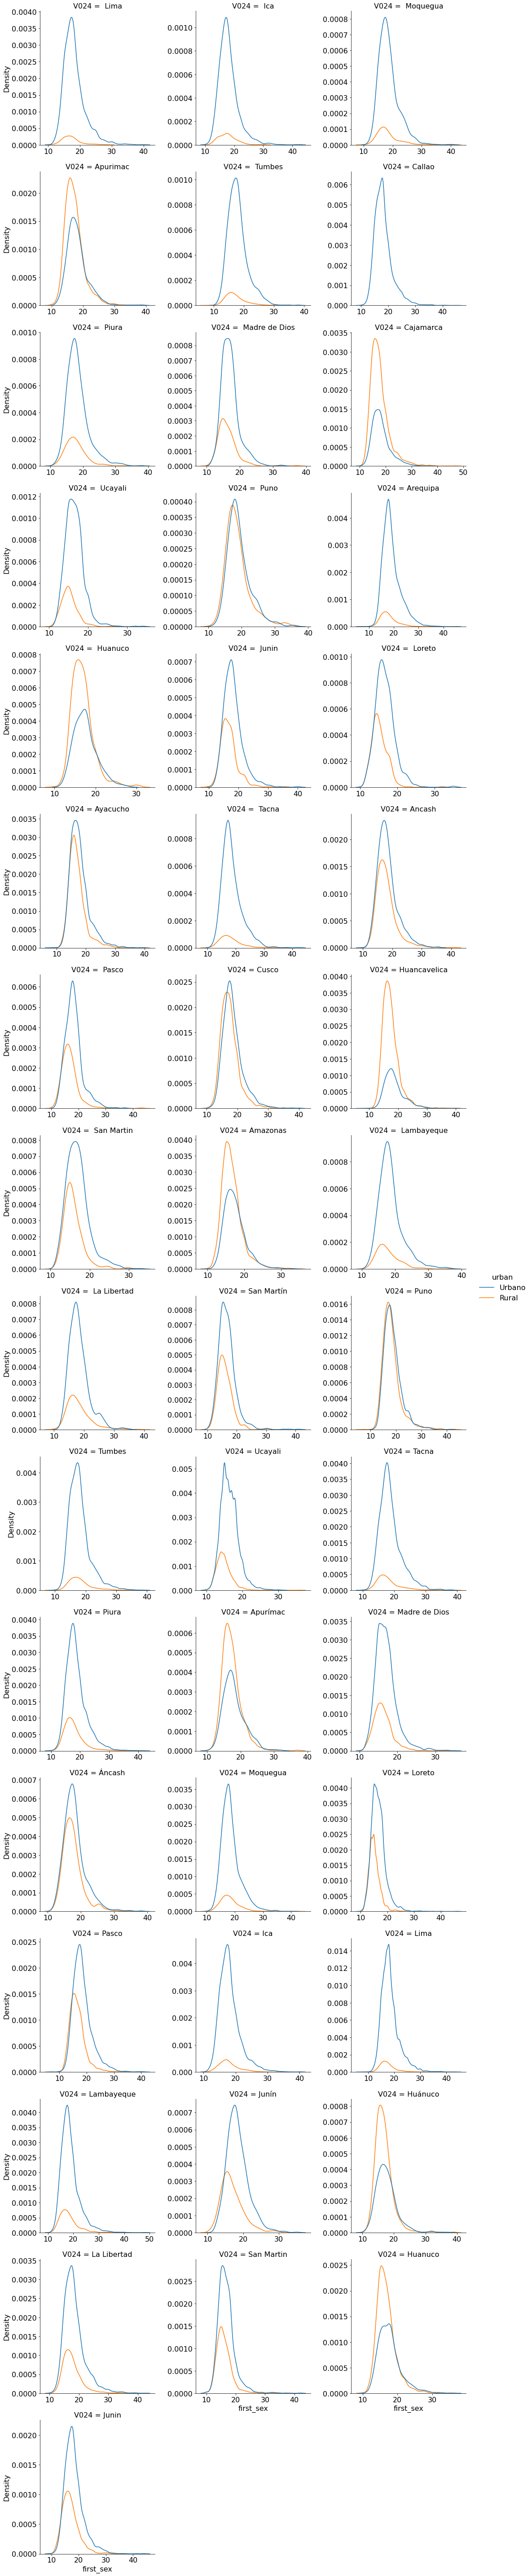

In [517]:
sns.displot( data = df, x = 'first_sex', 
            kind = 'kde', col = 'V024', 
            col_wrap = 3, 
            facet_kws = {'sharex' : False, 
                        'sharey' : False }, 
            hue = 'urban'
           )

In [511]:
df[ 'dpto' ] = df.V024.copy()

In [514]:
df.dpto = df.dpto.str.lstrip() \
            .str.replace( " ", "_" ) \
            .str.lower() \
            .apply( lambda x :  unidecode.unidecode( x ) )

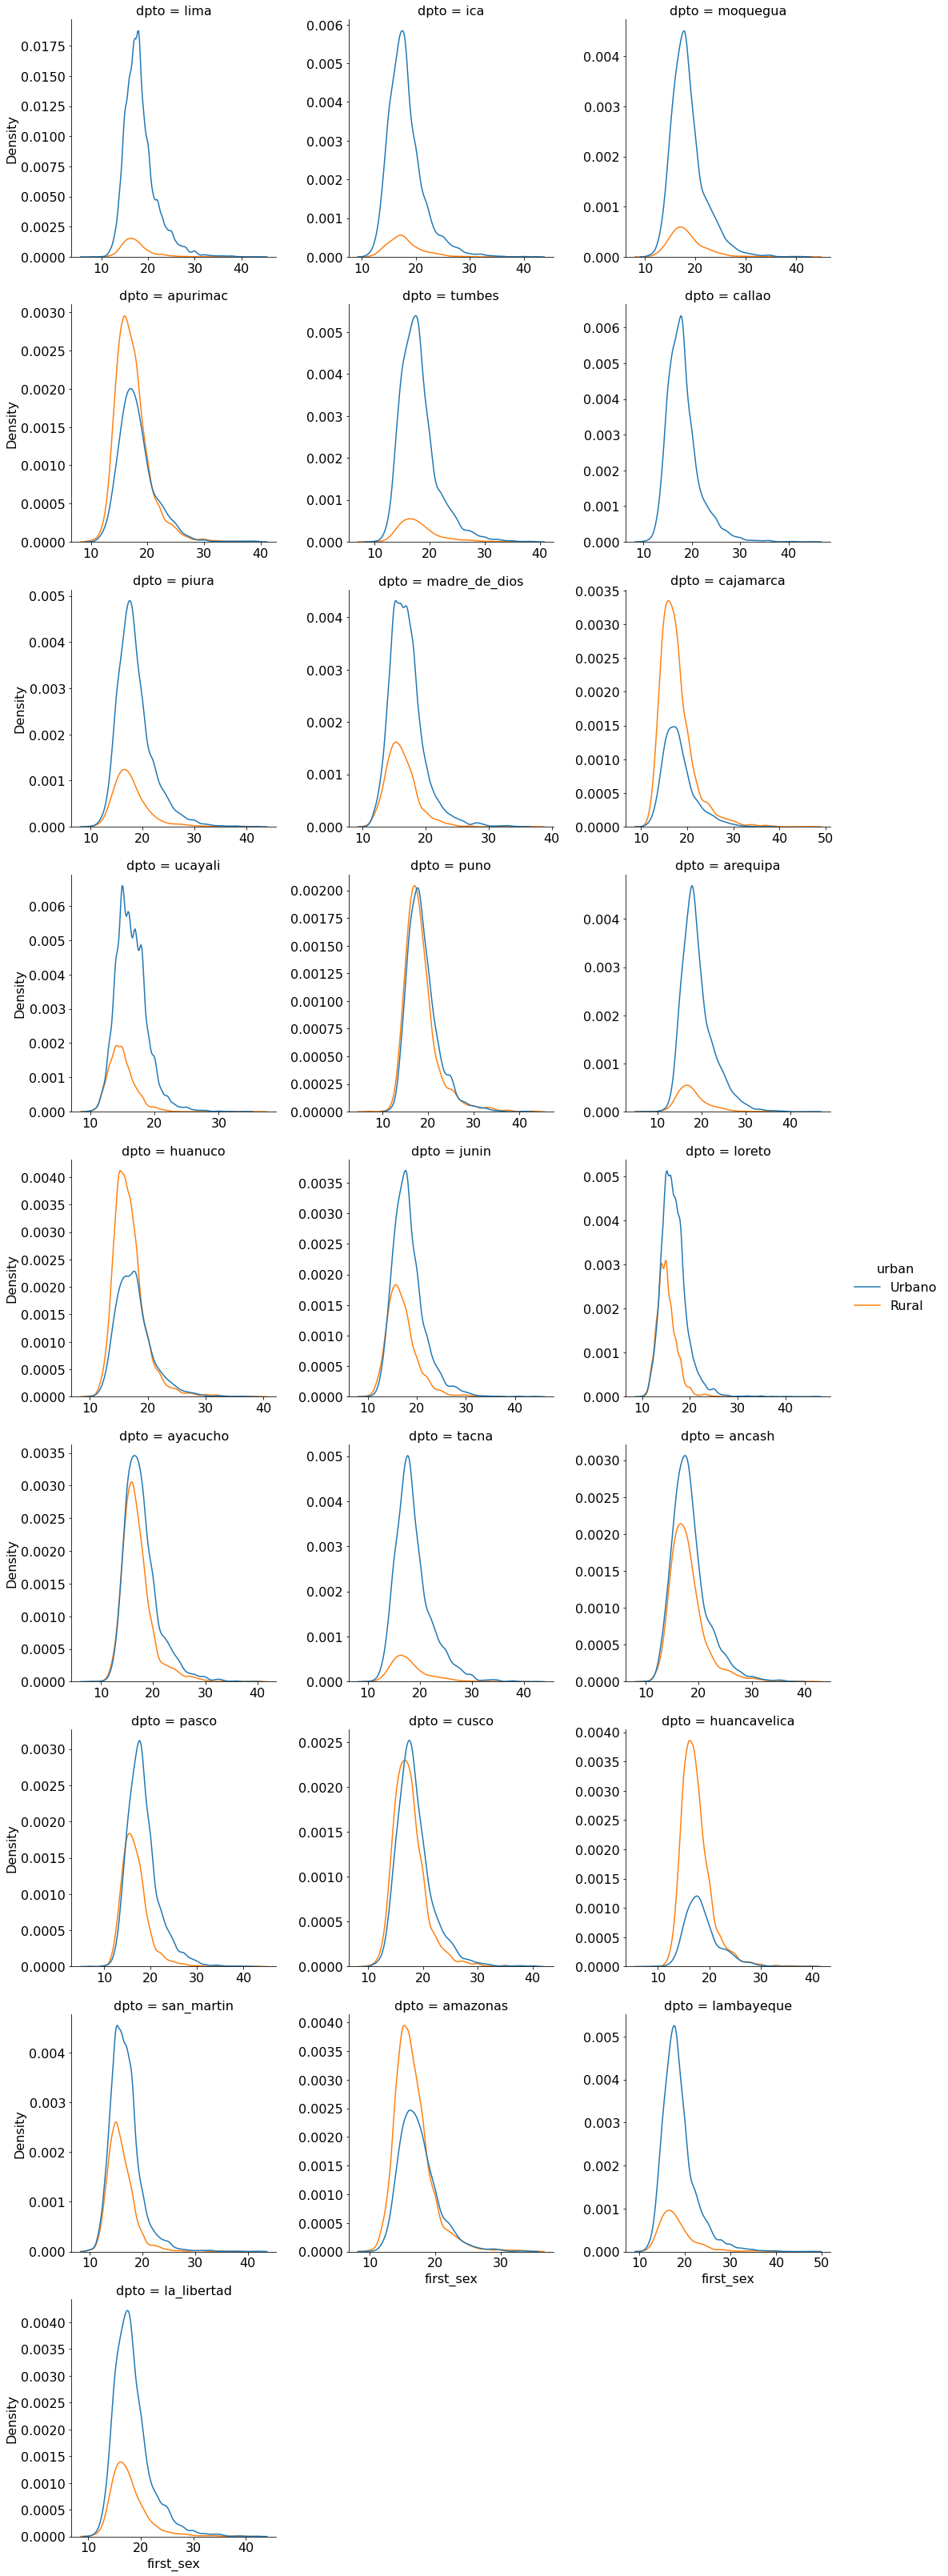

In [518]:
sns.displot( data = df, x = 'first_sex', 
            kind = 'kde', col = 'dpto', 
            col_wrap = 3, 
            facet_kws = {'sharex' : False, 
                        'sharey' : False }, 
            hue = 'urban'
           )

## Total children ever born by cohort and wife and husband education

In [500]:
df[ 'h_educ_yr' ] = df.V715.copy()

df.h_educ_yr.replace( 'No sabe', np.nan, inplace = True )
df.h_educ_yr.replace( "Don't know", np.nan, inplace = True )

In [501]:
df.loc[ ( df.V133 <= 12 ), 'w_educ' ] = 'Low'
df.loc[ ( df.V133 > 12), 'w_educ' ] = 'High'

df.loc[ ( df.h_educ_yr <= 12 ), 'h_educ_str' ] = 'Low'
df.loc[ ( df.h_educ_yr > 12), 'h_educ_str' ] = 'High'

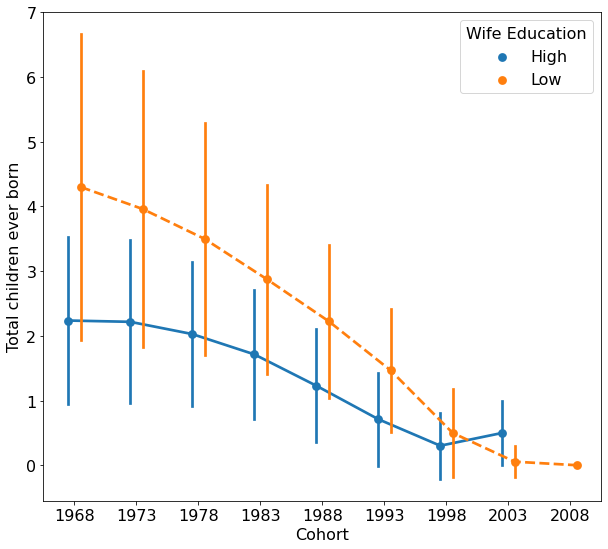

In [502]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "birth_cohort", y = "V201", 
               data = df, ci = 'sd', hue = 'w_educ', 
             dodge = 0.2, 
              linestyles = [ "-", "--" ] )

# x label
plt.xlabel( "Cohort" )
plt.ylabel( "Total children ever born" )

# Change legend title
plt.legend( title =  "Wife Education" )

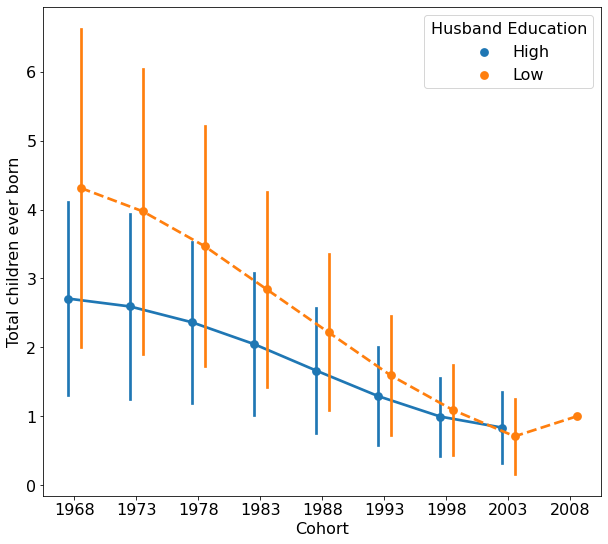

In [503]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "birth_cohort", y = "V201", 
               data = df, ci = 'sd', hue = 'h_educ_str', 
             dodge = 0.2, 
              linestyles = [ "-", "--" ] )

# x label
plt.xlabel( "Cohort" )
plt.ylabel( "Total children ever born" )

# Change legend title
plt.legend( title =  "Husband Education" )